In [1]:
#import needed libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pickle
from time import time
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm_notebook as tqdm
sns.set()
%matplotlib inline
import warnings
warning = [DeprecationWarning, FutureWarning, UserWarning]
for w in warning:
    warnings.filterwarnings("ignore", category=w)

In [2]:
#Windows beep for ending tasks
import winsound
def done():
    frequency = 2000  
    duration = 400  
    return winsound.Beep(frequency, duration)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#Let's look what is the size of the datasets 
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (200000, 202)
Test Shape: (200000, 201)


In [5]:
pd.set_option('display.max_columns', None) #display all columns
pd.set_option('display.max_rows', None) #display all rows
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [6]:
# Total number of records
n_records = len(train)

# Number of records where the client made the transaction
made = train.target.sum()

# Number of records where the client didn't make the transaction
didnt_make = n_records - made

# Percentage of transaction made
percentage = made / n_records 

# Print the results
print("Total number of records: {}".format(n_records))
print("Clients that made the transaction: {}".format(made))
print("Clients that didn't make the transaction: {}".format(didnt_make))
print("Percentage of clients that made the transaction: {}%".format(percentage*100))

Total number of records: 200000
Clients that made the transaction: 20098
Clients that didn't make the transaction: 179902
Percentage of clients that made the transaction: 10.049%


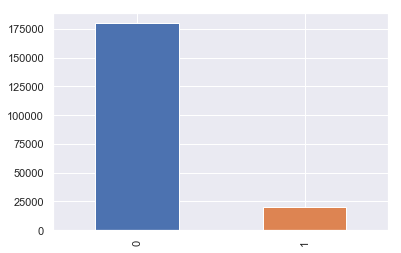

In [7]:
#Plot of distribution of 0 and 1 in the target
train.target.value_counts().plot.bar()

# Preprocessing the data

In [10]:
def drop_columns(dataset):
    columns = ['ID_code', 'target']
    for c in dataset.columns:
        if c in columns:
            dataset = dataset.drop(c, axis = 1)
    return dataset 

In [11]:
#Get a fraction of the data
def stratified_data(data, frac):
    strat_data = data.sample(frac = frac, random_state = 0 )
    y = strat_data['target']
    X = drop_columns(strat_data)
    return X, y

In [12]:
#Full features and targets datasets
y = train['target']
X = drop_columns(train)

In [14]:
def Scaler(data, scaler=None):
    if scaler == 'StandardScaler':
        scaler = StandardScaler()     
    elif scaler == 'MinMaxScaler':
        scaler = MinMaxScaler()     
    else:
        return data
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns= data.columns)
    return scaled_data

In [75]:
def data_preprocess(raw_data, size, scaler=None):
    #get a fraction of the data
    if size == 1.:
        strat_data = raw_data
    else:
        strat_data = raw_data.sample(frac = size, random_state = 0)
    
    #get target
    if 'target' in strat_data.columns:
        y = strat_data['target']
    else:
        y = None
    
    #get features
    columns = ['ID_code', 'target']
    for c in strat_data.columns:
        if c in columns:
            strat_data = strat_data.drop(c, axis = 1)
             
    #Feature Scaling
    if scaler == 'StandardScaler':
        scaler = StandardScaler()     
        X = pd.DataFrame(scaler.fit_transform(strat_data), columns= strat_data.columns)
    elif scaler == 'MinMaxScaler':
        scaler = MinMaxScaler()  
        X = pd.DataFrame(scaler.fit_transform(strat_data), columns= strat_data.columns)
    else:
        X = strat_data
    
    return X, y

In [13]:
from feature_selector import FeatureSelector

In [14]:
# Setting up the Feature Selector
fs = FeatureSelector(data = X, labels = y)

In [15]:
#Finding missing values
fs.identify_missing(missing_threshold=0.0)

0 features with greater than 0.00 missing values.



In [16]:
#Identifing collinear (highly correlated) features 
fs.identify_collinear(correlation_threshold = 0.95)

0 features with a correlation magnitude greater than 0.95.



In [17]:
"""
Finding Zero Importance Features
The method works by finding feature importances using a gradient boosting machine implemented in the LightGBM
"""
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 5, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.208957	valid_0's auc: 0.890462
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[880]	valid_0's binary_logloss: 0.207273	valid_0's auc: 0.892886
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[893]	valid_0's binary_logloss: 0.210891	valid_0's auc: 0.890281
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[894]	valid_0's binary_logloss: 0.209591	valid_0's auc: 0.893547
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[975]	valid_0's binary_logloss: 0.207194	valid_0's auc: 0.895341

0 features with zero importance after one-hot encoding.



In [18]:
"""
Low Importance Features
This method builds off the feature importances from the gradient boosting machine (identify_zero_importance must be run first)
by finding the lowest importance features not needed to reach a specified cumulative total feature importance. For example, 
if we pass in 0.99, this will find the lowest important features that are not needed to reach 99% of the total feature importance.
"""

fs.identify_low_importance(cumulative_importance = 0.99)

193 features required for cumulative importance of 0.99 after one hot encoding.
7 features do not contribute to cumulative importance of 0.99.



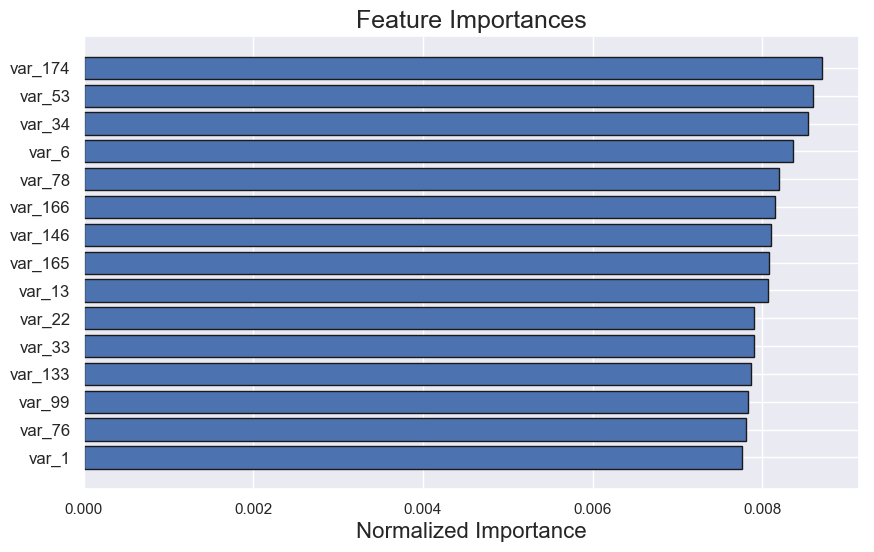

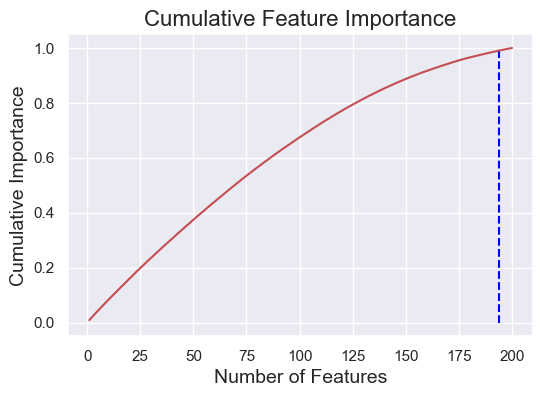

194 features required for 0.99 of cumulative importance


In [22]:
fs.plot_feature_importances(threshold = 0.99)

In [24]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:]

['var_7', 'var_10', 'var_103', 'var_30', 'var_17', 'var_185', 'var_117']

# Baseline Model - Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [18]:
#Return matrices for XGBoost
def get_xgb_matrix(X_train, X_test, y_train, y_test):
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    return D_train, D_test

In [19]:
#Creating train, test, split and transforming into XGBoost Matrices
def get_splits(X,y, DMatrix = True):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                      y,
                                      test_size = 0.25,
                                      random_state=0)
    if DMatrix == True:
        D_train, D_test = get_xgb_matrix(X_train, X_test, y_train, y_test)
        return D_train, D_test, y_test
    else:
        return X_train, X_test, y_train, y_test

In [20]:
#Calculate the metrics of the model
def metrics(y_test, predictions, probabilities):
    cm = confusion_matrix(y_test, predictions)
    auc = round(roc_auc_score(y_test, probabilities), 4)
    fpr = round(100 * (cm[0][1]/(cm[0][0]+cm[0][1])))
    tpr = recall_score(y_test, predictions)
    ppv = precision_score(y_test, predictions)
    return cm, auc, fpr, tpr, ppv

## Baseline Model Training

In [37]:
%%time
results = {}
count = 0

X, y = data_preprocess(train, 1., 'StandardScaler')

X_train, X_test, y_train, y_test_LR = get_splits(X, y, DMatrix= False)

baseline_model = LogisticRegressionCV(cv = 10, penalty= 'l2', n_jobs=-1)
baseline_model.fit(X_train, y_train)

preds_LR = baseline_model.predict(X_test)
proba_LR = baseline_model.predict_proba(X_test)[:,1]

cm, auc, fpr, tpr, ppv = metrics(y_test_LR, preds_LR, proba_LR)   
results[count] = {"TN": cm[0][0],
                  "FP": cm[0][1],
                  "FN": cm[1][0],
                  "TP": cm[1][1],
                  "AUC": auc,
                  "FPR": fpr,
                  "TPR": tpr,
                  "PPV": ppv
                 }
print("Done.")
sys.stdout.flush()
done()

Done.
Wall time: 10.4 s


In [38]:
cols = ["TN", "FP", "FN","TP","FPR","TPR","PPV","AUC"]
df_results = pd.DataFrame(results).T[cols]
df_results

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
0,44407.0,582.0,3714.0,1297.0,1.0,0.258831,0.690261,0.8622


In [39]:
print("AUC Result: %", round(df_results.AUC.mean(),4))
print("FPR Result: %", round(df_results.FPR.mean(),4))
print("Recall Result: %", round(df_results.TPR.mean(),4))
print("Precision Result: %", round(df_results.PPV.mean(),4))

AUC Result: % 0.8622
FPR Result: % 1.0
Recall Result: % 0.2588
Precision Result: % 0.6903


# XGBoost Model

In [43]:
#Training XGBoost model function
def model_training(dtrain, params, rounds):
    model = xgb.train(dtrain= dtrain, params= params, num_boost_round= rounds)
    return model

In [44]:
#make predictions based on probabilities and a threshold
def get_preds(probabilities, threshold):
    return np.array([1 if x > threshold else 0 for x in probabilities])

## Hyperparameters Optimization

In [45]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

X, y = data_preprocess(train, .4, 'StandardScaler')

D_train, D_test, y_test = get_splits(X,y, DMatrix=True)

def objective(space):
    # Instantiate the classifier
    params = {'colsample_bytree': space['colsample_bytree'], 
              'gamma': space['gamma'],
              'learning_rate': 0.1,            
              'max_depth': 2, 
              'min_child_weight': space['min_child_weight'], 
              'reg_alpha': space['reg_alpha'], 
              'scale_pos_weight': space['scale_pos_weight'], 
              'subsample': space['subsample'],
              'objective': "binary:logistic",
              'tree_method': 'gpu_hist',
              'silent': 1
         }
    
    model = model_training(D_train, params, 10)

    # Predict probabilities on training set
    probas = model.predict(D_test)
    
    # Calculate our Metric - AUC on testing set
    auc = roc_auc_score(y_test, probas)

    # return loss function.
    return {'loss': -auc, 'status': STATUS_OK }

In [46]:
space ={'min_child_weight': hp.quniform ('min_child_weight', 1, 5, 1),
        'subsample': hp.quniform ('subsample', 0.5, 1., 0.05),
        'gamma' : hp.quniform ('gamma', 5,10,1),
        'reg_alpha' : hp.quniform ('reg_alpha', 0.1,1.0,0.05),
        'colsample_bytree' : hp.quniform ('colsample_bytree', 0.2,0.9,0.1),
        'scale_pos_weight' : hp.uniform('scale_pos_weight', 8,10),
    }

In [47]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=500,
            trials=trials)
print(best)
done()

100%|████████████████████████████████████████████████| 500/500 [02:42<00:00,  2.81it/s, best loss: -0.7190164275621858]
{'colsample_bytree': 0.2, 'gamma': 6.0, 'min_child_weight': 1.0, 'reg_alpha': 0.75, 'scale_pos_weight': 9.265932701520121, 'subsample': 0.7000000000000001}


In [48]:
#Getting the best hyperparameters 
def get_best_hyperparameters(best):
    params = best.copy()
    params['learning_rate'] = 0.1
    params['max_depth'] = 2
    params['objective'] = "binary:logistic"
    params['tree_method'] = 'gpu_hist'
    params['silent'] = 1
    return params

## Training and Validation

In [49]:
#Setting up RepeatedStratifiedKFold
splits = 4
repeats = 2
iterations = splits * repeats
rskf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats, random_state=0)

In [50]:
%%time

results_xgb = {}
count = 0

X, y = data_preprocess(train, 1., 'StandardScaler')

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
    D_train, D_test = get_xgb_matrix(X_train, X_test, y_train, y_test)
    
    xgbmodel = model_training(D_train, get_best_hyperparameters(best), 2000)
    
    probas = xgbmodel.predict(D_test)

    preds = get_preds(probas, 0.5)
   
    cm, auc, fpr, tpr, ppv = metrics(y_test, preds, probas)   
    results_xgb[count] = {"TN": cm[0][0],
                      "FP": cm[0][1],
                      "FN": cm[1][0],
                      "TP": cm[1][1],
                      "AUC": auc,
                      "FPR": fpr,
                      "TPR": tpr,
                      "PPV": ppv
                     }
    count += 1
    print("\rTraining. {}/{} AUC= {}".format(count,iterations, auc), end=" ")
    sys.stdout.flush()
done()

Training. 8/8 AUC= 0.8937        Wall time: 1min 42s


In [51]:
cols = ["TN", "FP", "FN","TP","FPR","TPR","PPV","AUC"]
df_results_xgb = pd.DataFrame(results_xgb).T[cols]
df_results_xgb

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
0,37926.0,7050.0,1073.0,3952.0,16.0,0.786468,0.359207,0.8965
1,38038.0,6938.0,1080.0,3945.0,15.0,0.785075,0.362492,0.8947
2,38131.0,6844.0,1093.0,3931.0,15.0,0.782444,0.364826,0.8963
3,37944.0,7031.0,1083.0,3941.0,16.0,0.784435,0.359187,0.8982
4,38064.0,6912.0,1098.0,3927.0,15.0,0.781493,0.362303,0.8964
5,38103.0,6873.0,1093.0,3932.0,15.0,0.782488,0.363906,0.8965
6,38103.0,6872.0,1050.0,3974.0,15.0,0.791003,0.366402,0.8985
7,37909.0,7066.0,1114.0,3910.0,16.0,0.778264,0.356232,0.8937


In [52]:
df_results_xgb.describe()

,TN,FP,FN,TP,FPR,TPR,PPV,AUC
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,38027.250000,6948.250000,1085.500000,3939.000000,15.375000,0.783959,0.361819,0.896350
std,88.536917,88.503027,19.026298,19.018788,0.517549,0.003786,0.003382,0.001596
min,37909.000000,6844.000000,1050.000000,3910.000000,15.000000,0.778264,0.356232,0.893700
25%,37939.500000,6872.750000,1078.250000,3930.000000,15.000000,0.782206,0.359202,0.895900
50%,38051.000000,6925.000000,1088.000000,3936.500000,15.000000,0.783461,0.362397,0.896450
75%,38103.000000,7035.750000,1094.250000,3946.750000,16.000000,0.785423,0.364136,0.896925
max,38131.000000,7066.000000,1114.000000,3974.000000,16.000000,0.791003,0.366402,0.898500


numpy.ndarray

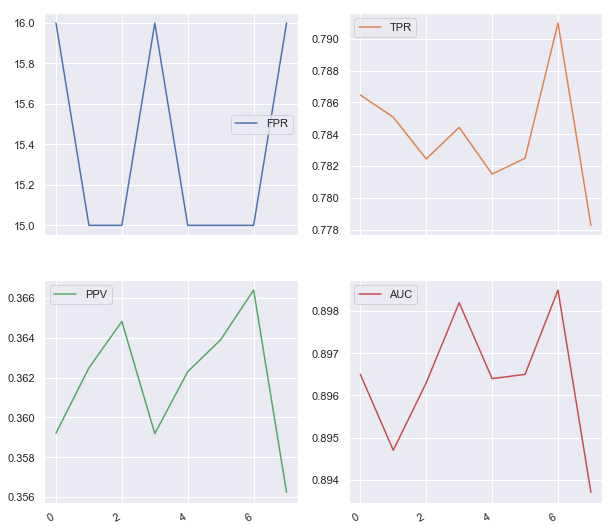

In [53]:
axes = df_results_xgb[["FPR","TPR","PPV","AUC"]].plot(subplots=True, layout=(2,2), figsize = (10,10))
type(axes)

In [54]:
print("Average AUC Result: %", round(df_results_xgb.AUC.mean(),4))
print("Average FPR Result: %", round(df_results_xgb.FPR.mean(),4))
print("Average TPR Result: %", round(df_results_xgb.TPR.mean(),4))
print("Average PPV Result: %", round(df_results_xgb.PPV.mean(),4))

Average AUC Result: % 0.8963
Average FPR Result: % 15.375
Average TPR Result: % 0.784
Average PPV Result: % 0.3618


### Save the model to disk

In [55]:
filename = 'finalized_model.sav'
pickle.dump(xgbmodel, open(filename, 'wb'))

## Feature Importances

In [56]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
ceate_feature_map(X)

In [57]:
def itemgetter(*items):
    if len(items) == 1:
        item = items[0]
        def g(obj):
            return obj[item]
    else:
        def g(obj):
            return tuple(obj[item] for item in items)
    return g

In [58]:
importance = xgbmodel.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore_ratio'] = df['fscore'] / df['fscore'].sum()
feat_imp = df.sort_values(by=['fscore'],ascending=False )
feat_imp.head(10)

,feature,fscore,fscore_ratio
198,var_78,60,0.010000
197,var_190,59,0.009833
196,var_6,56,0.009333
195,var_34,54,0.009000
194,var_12,53,0.008833
193,var_166,52,0.008667
192,var_53,52,0.008667
191,var_174,52,0.008667
190,var_1,52,0.008667
186,var_13,51,0.008500


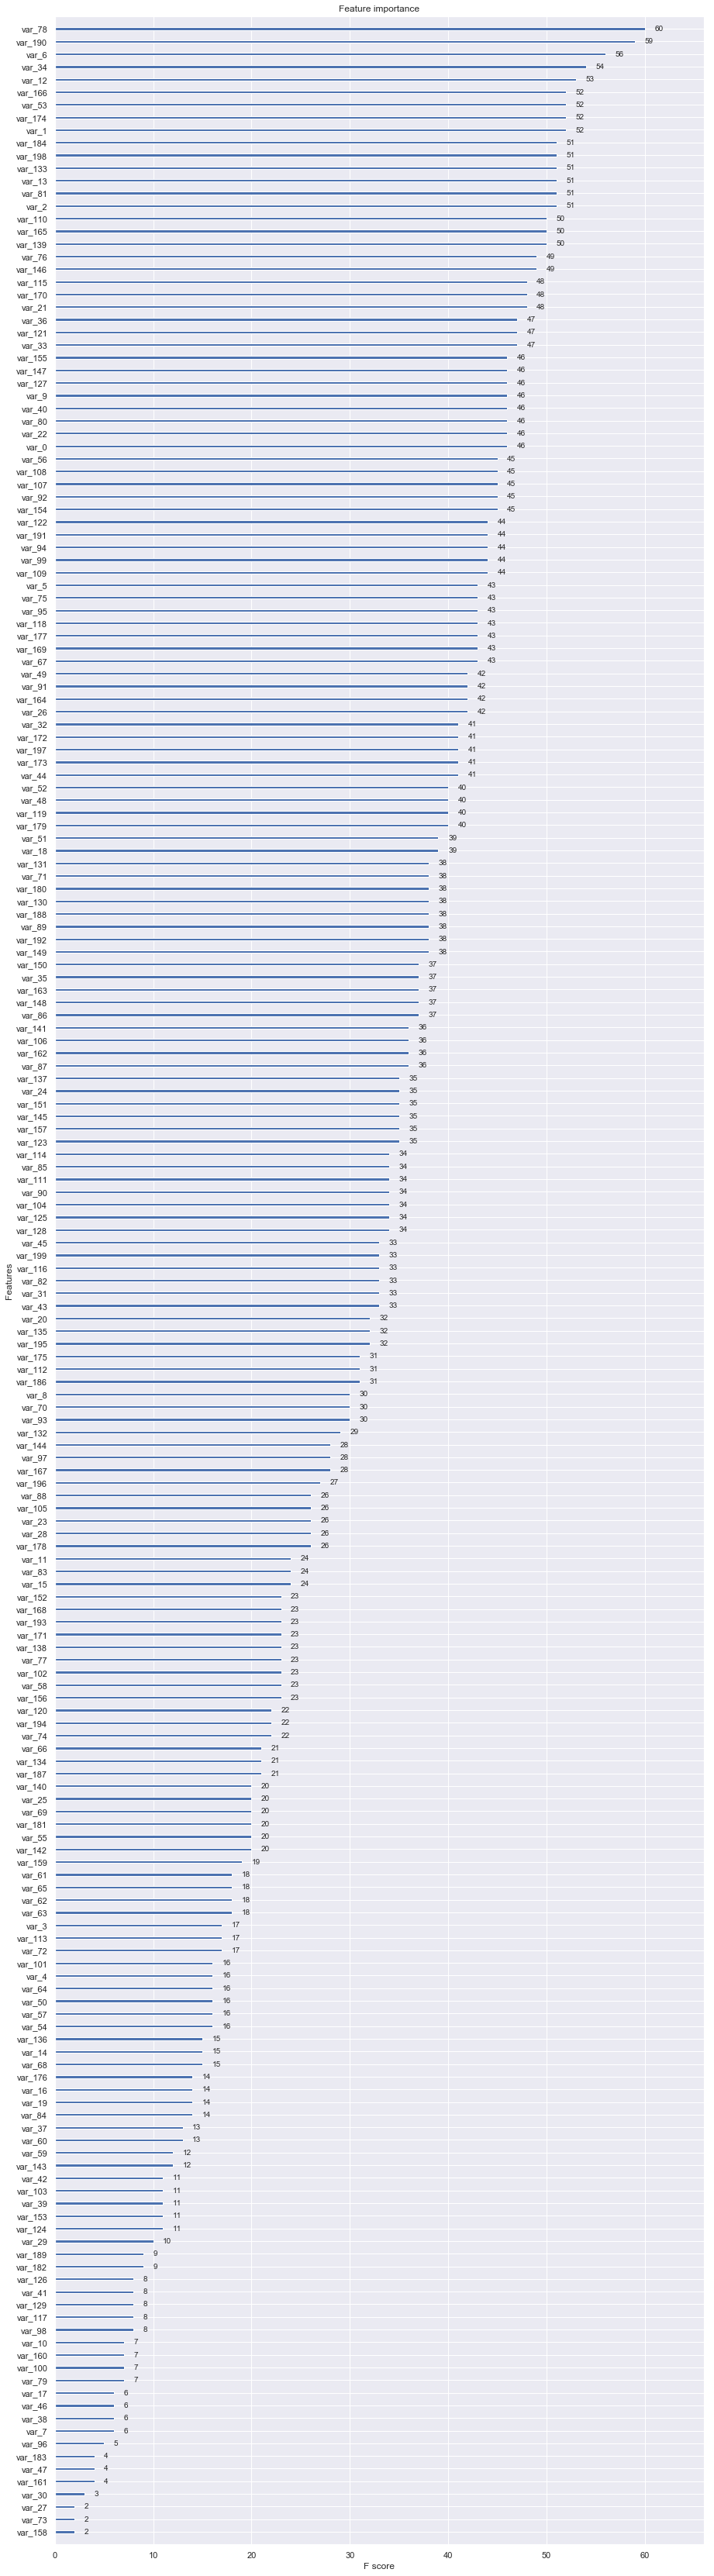

In [59]:
def my_plot_importance(booster, figsize, **kwargs): 
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)
my_plot_importance(xgbmodel, (15,60))

## Model ROC Curve

In [60]:
roc_values = []
for thresh in np.linspace(0, 1, 101):
    preds = get_preds(probas, thresh)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

In [61]:
LR_roc_values = []
for thresh in np.linspace(0, 1, 101):
    preds = get_preds(proba_LR, thresh)
    tn, fp, fn, tp = confusion_matrix(y_test_LR, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    LR_roc_values.append([tpr, fpr])
LR_tpr_values, LR_fpr_values = zip(*LR_roc_values)

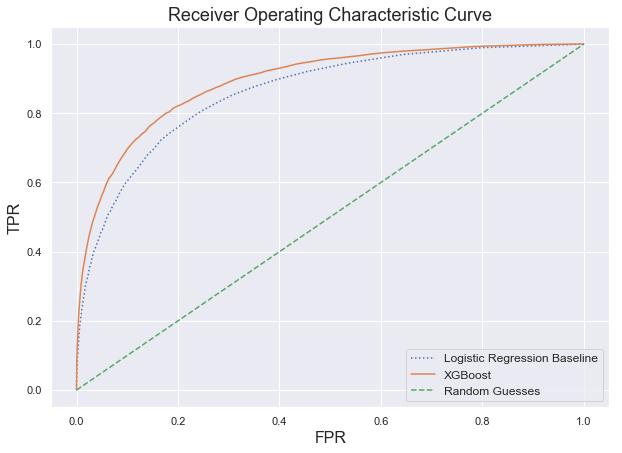

In [80]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(LR_fpr_values, LR_tpr_values,
        label='Logistic Regression Baseline',
        linestyle='dotted')
ax.plot(fpr_values, tpr_values,
        label='XGBoost')
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='Random Guesses',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

# Submission

In [76]:
def transform_data(data):
    X, _ = data_preprocess(data, 1., 'StandardScaler')
    dtest = xgb.DMatrix(X)
    return dtest

In [77]:
def make_csv(d_test, model):
    preds_final = model.predict(d_test)
    predictions = pd.Series(preds_final, index = test['ID_code'], name = 'target')
    return predictions.to_csv("submission.csv", header = True)

In [78]:
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [79]:
d_test = transform_data(test)
make_csv(d_test, loaded_model)
done()

### Submission Score: **0.89603**